<a href="https://colab.research.google.com/github/itzmevig/Codtech-ml/blob/main/Creditcard_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Creditcard Fraud Detection using Machine Learning and Neural Networks**

In [ ]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [ ]:
data = pd.read_csv('/content/creditcard.csv.zip')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
len(data)

284807

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


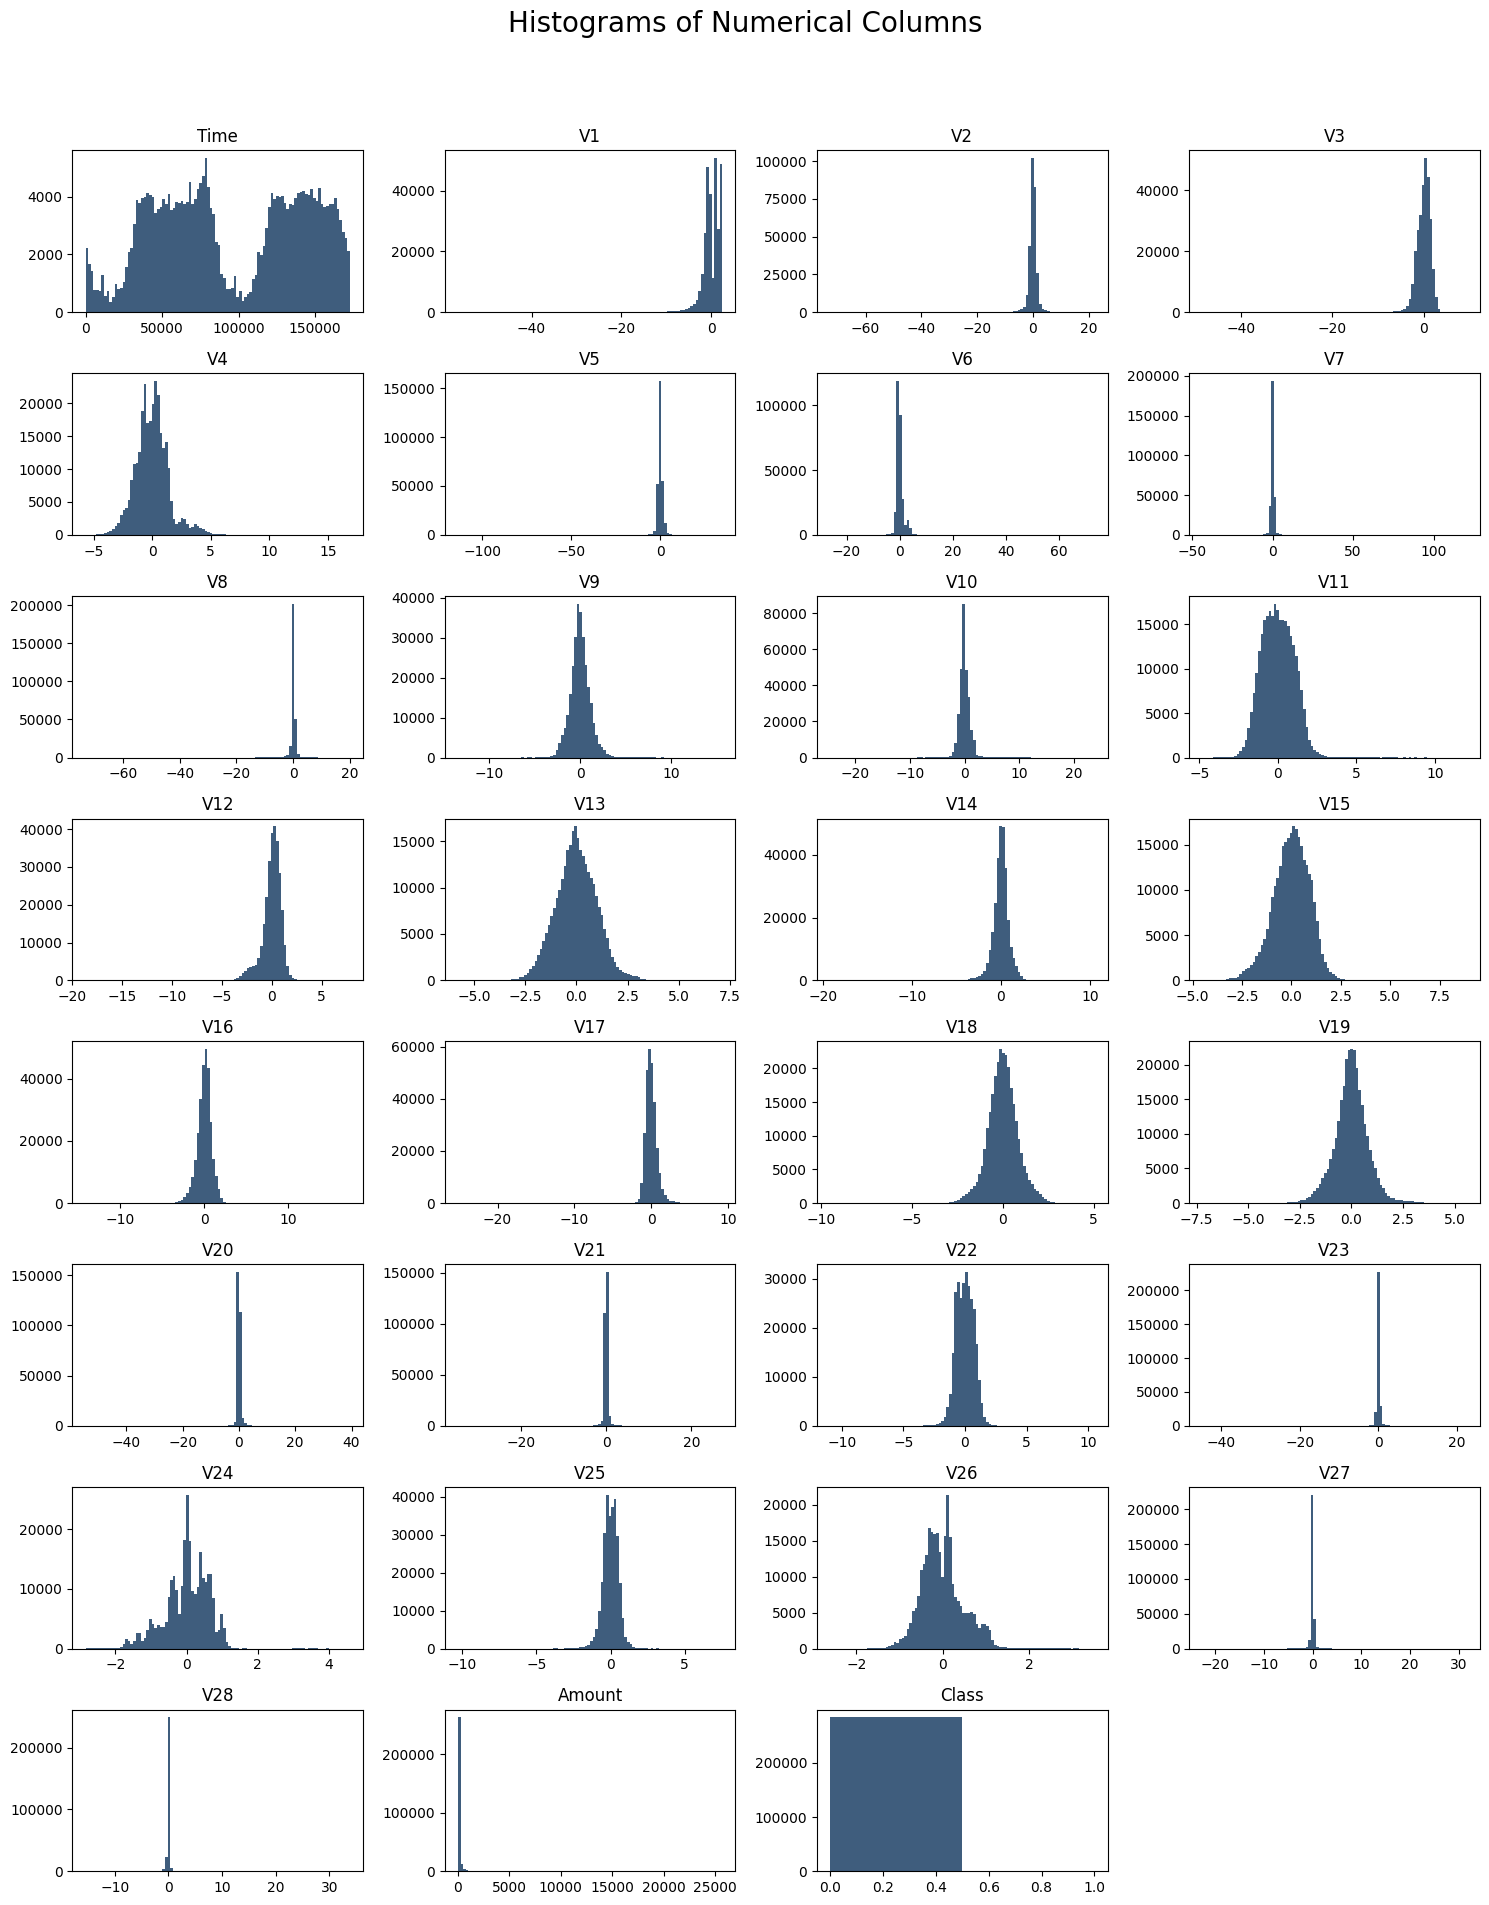

In [ ]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum

    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))


Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


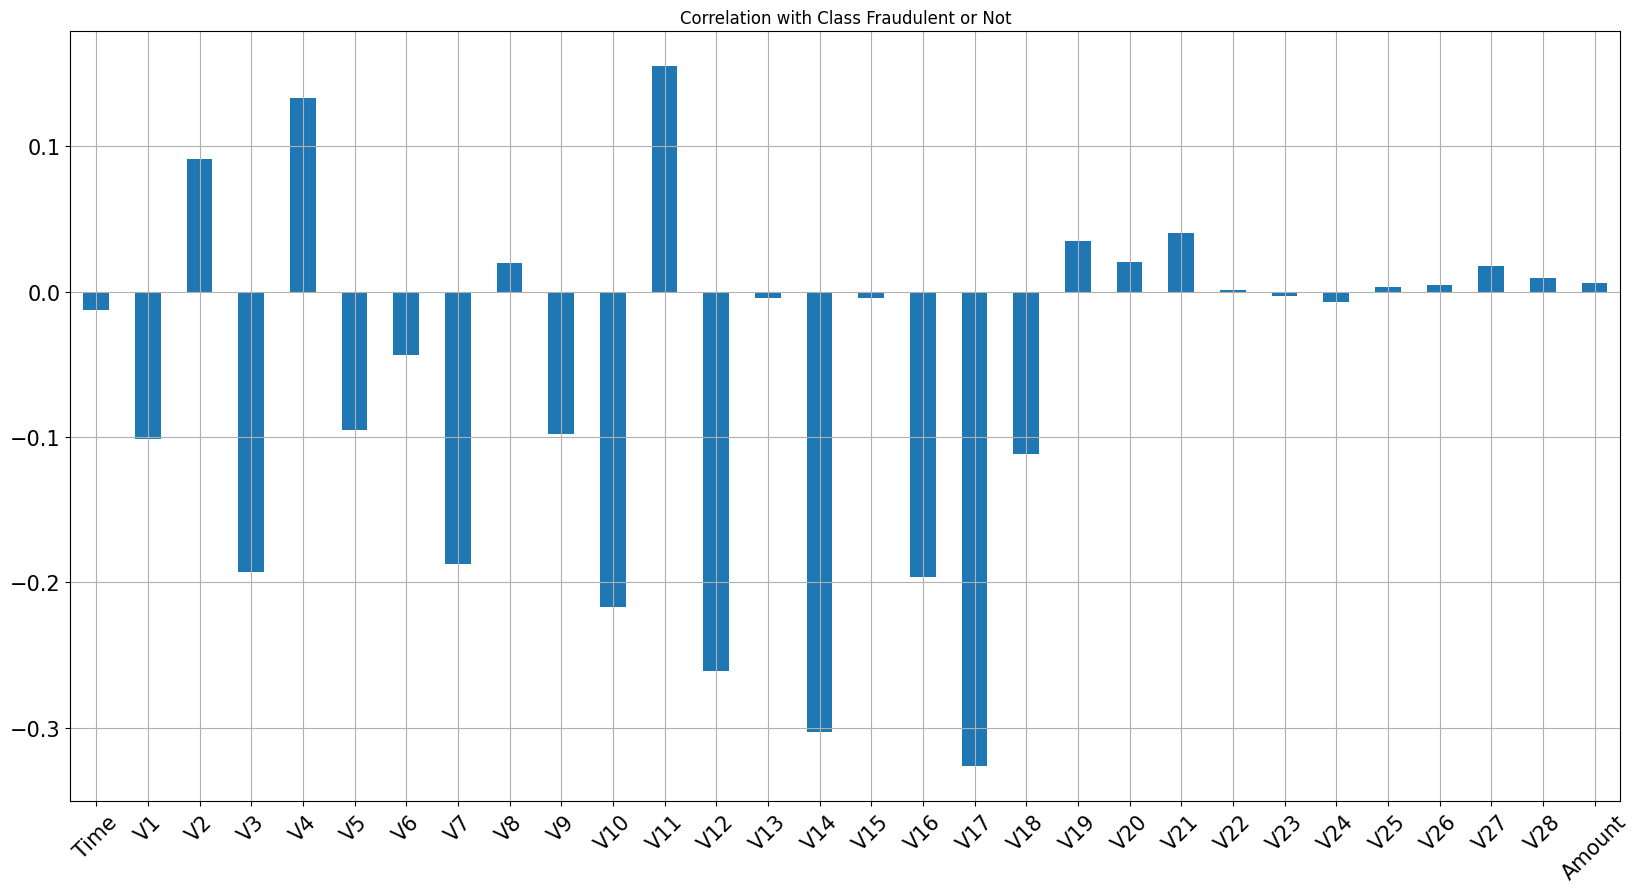

In [ ]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not

In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
X_train.shape

(199364, 29)

In [ ]:
X_test.shape

(85443, 29)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest = RandomForestClassifier(n_jobs=-1)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, n_jobs=-1)


In [ ]:
import cProfile
cProfile.run('random_forest.fit(X_train, y_train.values.ravel())')


         100984 function calls (99682 primitive calls) in 73.208 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       90    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
        6    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:404(parent)
        1    0.000    0.000   73.207   73.207 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__eq__)
       10    0.000    0.000    0.000    0.000 __init__.py:33(using_copy_on_write)
        2    0.000    0.000    0.000    0.000 __init__.py:36(__init__)
        2    0.000    0.000    0.000    0.000 __init__.py:43(start)
        2    0.000    0.000    0.000    0.000 __init__.py:7(_make_name)
        1    0.000    0.000    0.000    0.000 _array_api.py:12(_check_array_api_dispatch)
        6    0.000    0.000    0.000    0.000 _array_api.py:170(_check_device_cpu)
       26    0.000    0.000    0.000   

In [ ]:
random_forest.fit(X_train[:1000], y_train.values.ravel()[:1000])


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       n_jobs=-1)

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_test,y_test)

0.9986774808936952

In [ ]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85285    11]
 [  102    45]]


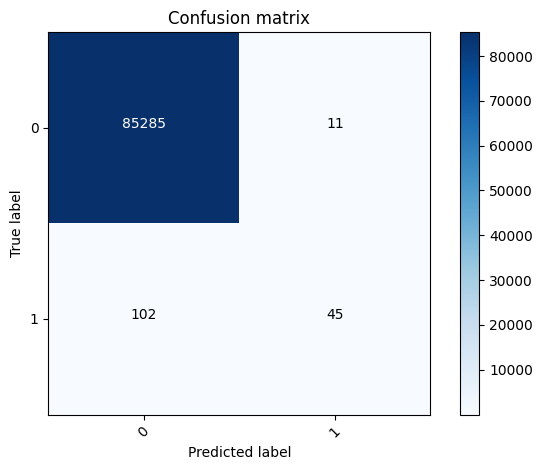

In [ ]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

accuracy:0.9987 	precision:0.8036 	recall:0.3061 	F1-score:0.4433


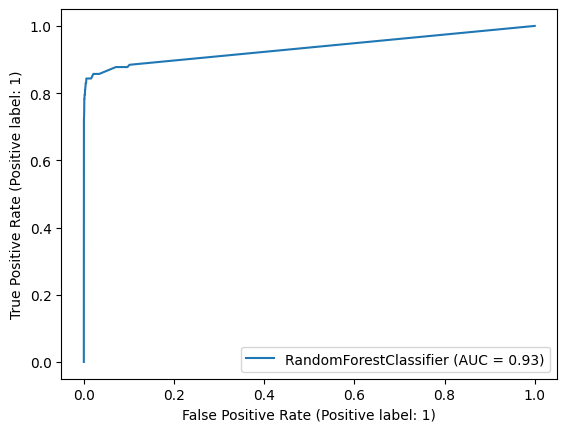

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc, '\tprecision:%0.4f'%prec, '\trecall:%0.4f'%rec, '\tF1-score:%0.4f'%f1)

RocCurveDisplay.from_estimator(random_forest, X_test, y_test)


In [ ]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998677,0.693878,0.306122,0.803571,0.44335


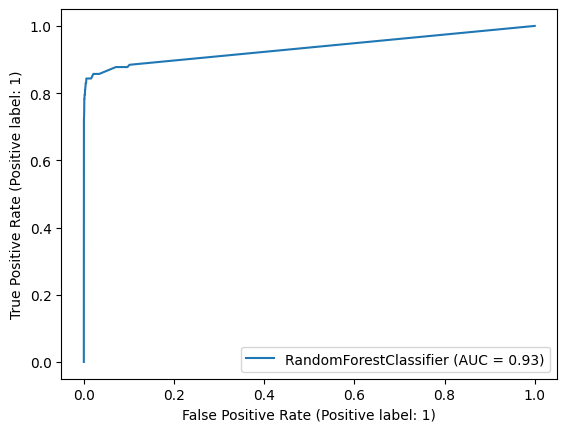

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve
ROC_RF = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()


Confusion matrix, without normalization
[[284282     33]
 [   359    133]]


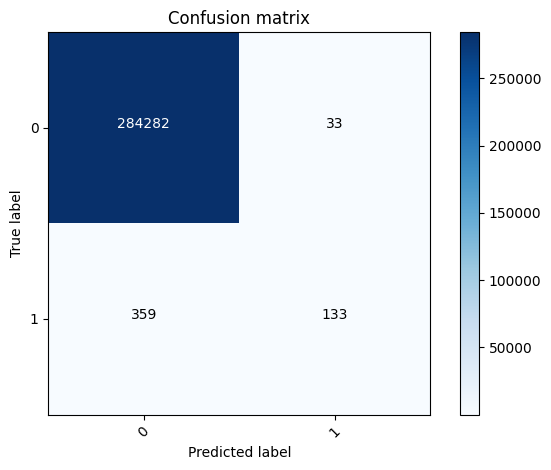

In [ ]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9986 	precision:0.8012 	recall:0.2703 	F1-score:0.4043


In [ ]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998624,0.729675,0.270325,0.801205,0.404255


Decision Tree

**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
decision_tree.score(X_test,y_test)

0.9993094811745842

Confusion matrix, without normalization
[[85273    23]
 [   36   111]]


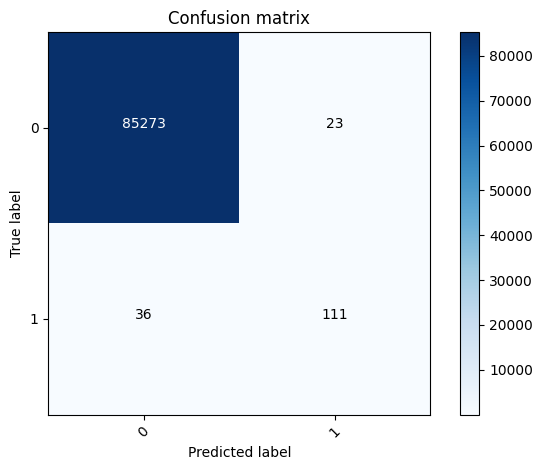

In [ ]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
import pandas as pd

# Create the model results DataFrame
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
                             columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to append the new results to the existing DataFrame
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

# Display the results_testset
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998677,0.693878,0.306122,0.803571,0.443350
1,DecisionTree,0.999309,0.244898,0.755102,0.828358,0.790036


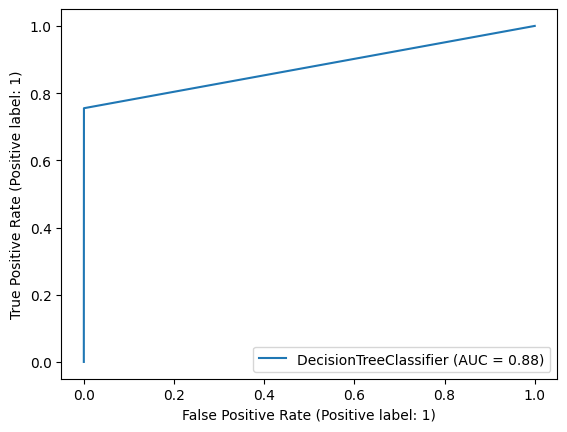

In [ ]:
# Import the required function
from sklearn.metrics import RocCurveDisplay

# Generate the ROC curve
ROC_DT = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)

# Display the plot
plt.show()


Confusion matrix, without normalization
[[284292     23]
 [    36    456]]


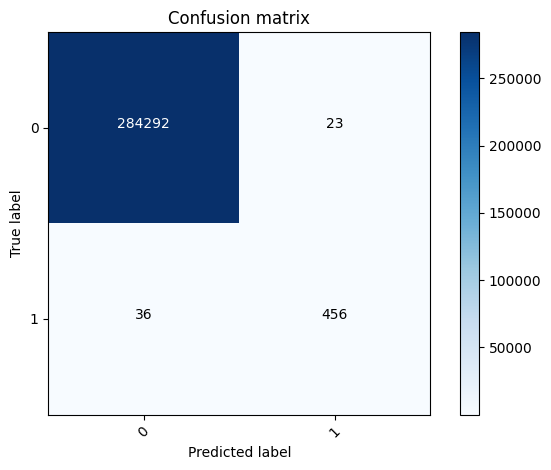

In [ ]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [ ]:
import pandas as pd

# Create the model results DataFrame
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
                             columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to append the new results to the existing DataFrame
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)

# Display the results_fullset DataFrame
results_fullset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998624,0.729675,0.270325,0.801205,0.404255
1,DecisionTree,0.999793,0.073171,0.926829,0.951983,0.939238


Neural Networks

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

**Neural Network Models**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,341 (24.77 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,228 (16.52 KB)

 **Training**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9994 - loss: 0.0041
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9994 - loss: 0.0035


In [ ]:
score = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0040


In [ ]:
print(score)

[0.0042107184417545795, 0.9994031190872192]


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Test Data Accuracy: 0.9994


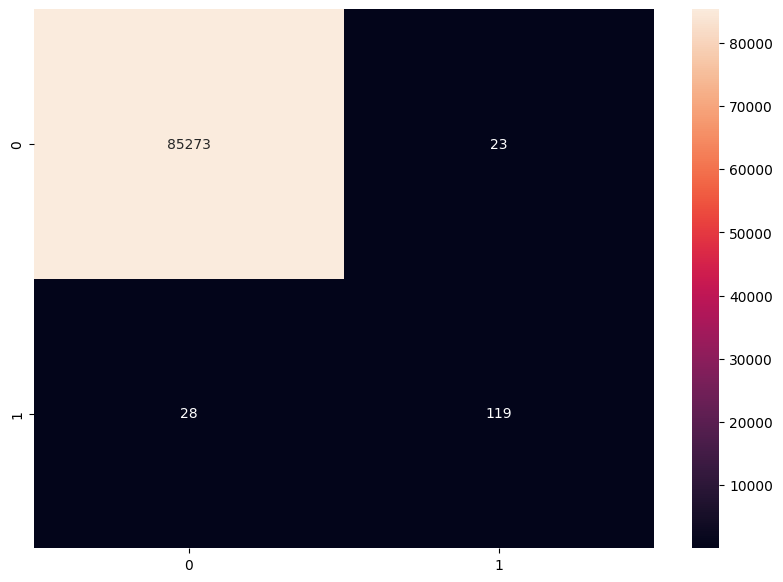

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
# Alternative approach to plot confusion matrix (from scikit-learn.org site)
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)    # Pandas format required by confusion_matrix function

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   # y_pred.round() to convert probability to either 0 or 1 in line with y_test

In [ ]:
print(cnf_matrix)

[[85273    23]
 [   28   119]]


Confusion matrix, without normalization
[[85273    23]
 [   28   119]]


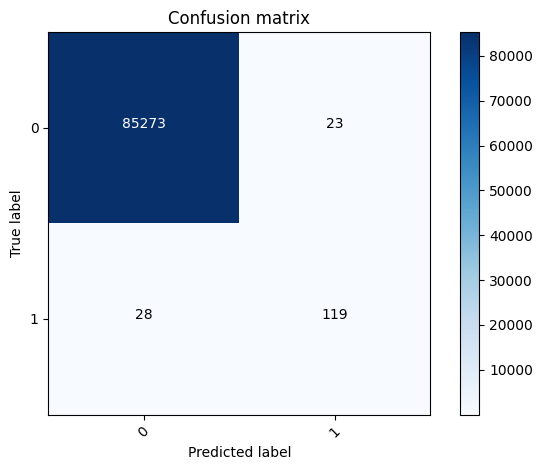

In [ ]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [ ]:
import pandas as pd

# Create the model results DataFrame
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
                             columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to append the new results to the existing DataFrame
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

# Display the results_testset DataFrame
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998677,0.693878,0.306122,0.803571,0.443350
1,DecisionTree,0.999309,0.244898,0.755102,0.828358,0.790036
2,PlainNeuralNetwork,0.999403,0.190476,0.809524,0.838028,0.823529


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
Confusion matrix, without normalization
[[284242     73]
 [    90    402]]


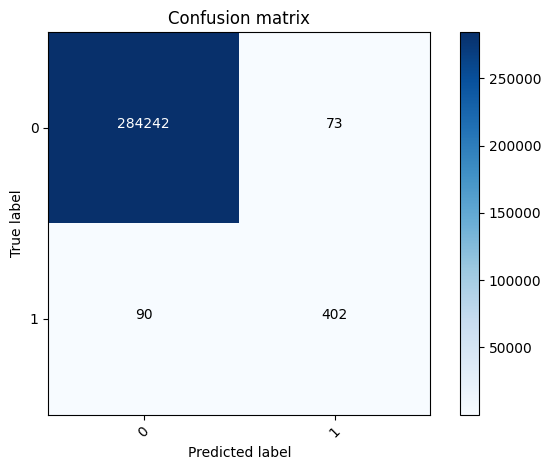

In [ ]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [ ]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [ ]:
import pandas as pd

# Create the model results DataFrame
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
                             columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to append the new results to the existing DataFrame
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)

# Display the results_fullset DataFrame
results_fullset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998624,0.729675,0.270325,0.801205,0.404255
1,DecisionTree,0.999793,0.073171,0.926829,0.951983,0.939238
2,PlainNeuralNetwork,0.999428,0.182927,0.817073,0.846316,0.831437


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=np.array([y_train[i][0] for i in range(len(y_train))]))

# Convert the resulting array to a dictionary mapping class labels to their respective weights
class_weights = dict(enumerate(class_weights))

# Display the class weights
class_weights


{0: 0.500866751415694, 1: 288.93333333333334}

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Assuming y_train is already defined and is your training target labels
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=np.array([y_train[i][0] for i in range(len(y_train))]))

# Convert the resulting array to a dictionary mapping class labels to their respective weights
class_weights = dict(enumerate(class_weights))

# Now use this class_weights dictionary in model.fit
model.fit(X_train, y_train, batch_size=15, epochs=5, class_weight=class_weights, shuffle=True)


Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9692 - loss: 0.3698
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9745 - loss: 0.2330
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9580 - loss: 0.2439
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9767 - loss: 0.2310
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9786 - loss: 0.2122


In [ ]:
score_weighted = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9941 - loss: 0.0197


In [ ]:
print(score_weighted)

[0.020545991137623787, 0.9942651987075806]


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Test Data Accuracy: 0.9943


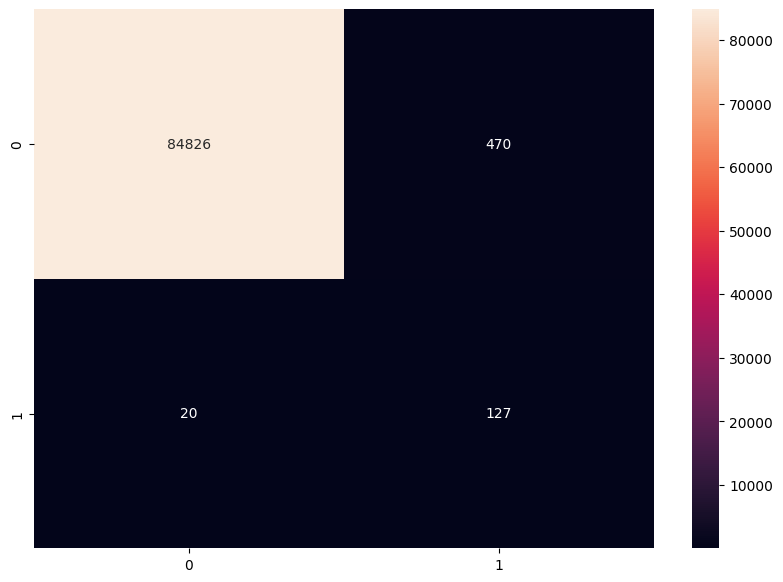

In [ ]:
## Confusion Matrix on unseen test set
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [ ]:
import pandas as pd

# Create the model results DataFrame
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
                             columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to append the new results to the existing DataFrame
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

# Display the results_testset DataFrame
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.998677,0.693878,0.306122,0.803571,0.443350
1,DecisionTree,0.999309,0.244898,0.755102,0.828358,0.790036
2,PlainNeuralNetwork,0.999403,0.190476,0.809524,0.838028,0.823529
3,WeightedNeuralNetwork,0.994265,0.136054,0.863946,0.212730,0.341398


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
Confusion matrix, without normalization
[[282741   1574]
 [    40    452]]


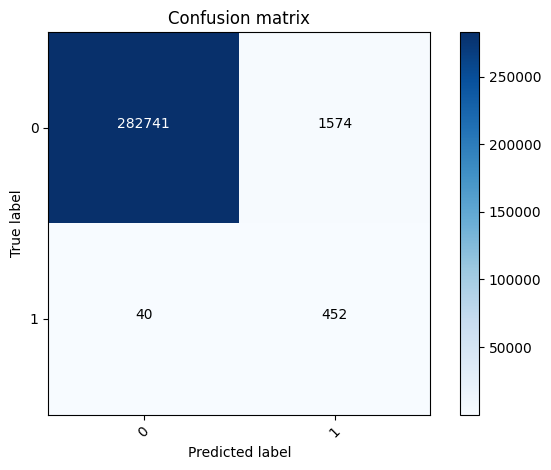

In [ ]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()